
# Data Pre-Processing

## Getting data ready for use

In [ ]:
import os
import sys
import pandas as pd
import numpy as np

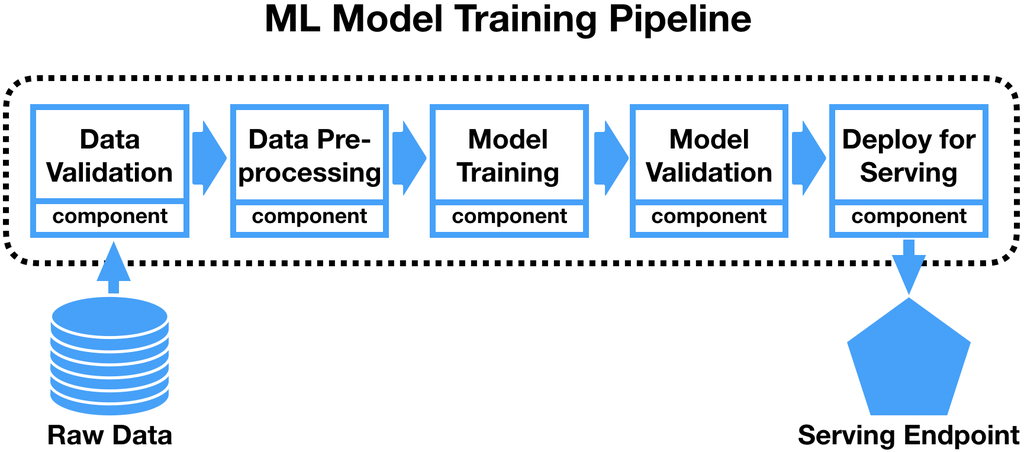

Training a model is just one step of the modeling and data science pipeline.

To start with, one needs to prepare the data so that it is possible to use for training a model as the data is not readily processed in the real world. Raw data comes with many problems and pre-processing is one step of turning this data into something clean and ready for training and using a model, such as logistic regression.

## The importance of pre-processing

- Data Scientists spend 60% to 80% of their time **pre-processing** and cleaning data (see Forbes  [Cleaning Big Data](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=2d8c1dfc6f63)).

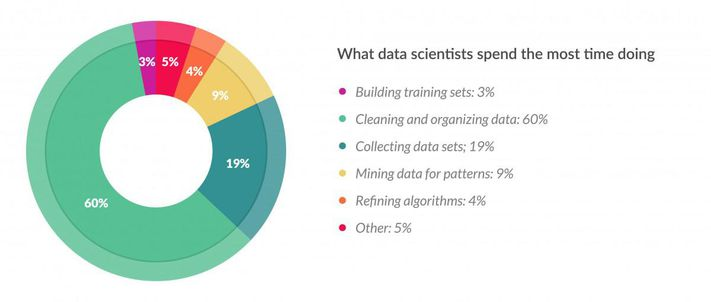

## Pre-processing pitfalls!

- No surprise that invalid pre-processing often becomes a source of data loss, look-ahead bias, etc. 
- It is **essential** to perform exploratory data analysis, model fitting, and hypothesis design on **training** data!


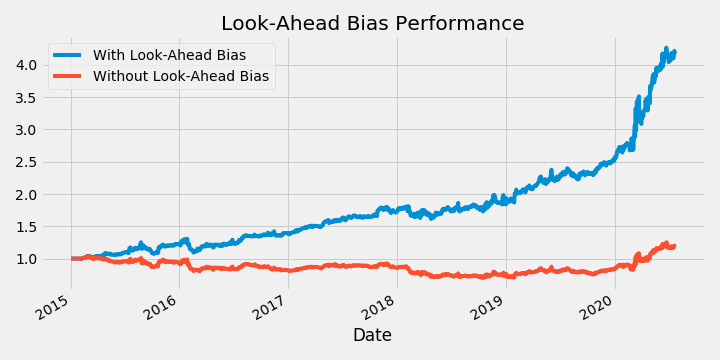

Pre-processing is not glamorous, as it is usually about cleaning up data. However, it is one of the most important parts of modeling, and takes a big chunk of the total time in a project. It can be the difference between your model working or not.

# Overview

Transforming real world data to suit machine learning algorithms:

* Turning nominal features into numbers
* Normalization
* Dealing with missing values and outliers
* Embeddings and dimensionality reduction

Working with real world data usually requires various levels of pre-processing. Some of this is related to cleaning the data - removing incorrect or irrelevant items, dropping unused features, renaming features, and so on.

Another aspect is getting the data into the right format for the machine learning models.

In this learning unit, we'll look at how to deal with discrete and continuous data, with examples of common situations and useful Python tools for handling them efficiently.

## Discrete data

* Ordinal - order of labels has meaning
    * Days of the week, letter grades, rating scales
* Nominal - order of labels not important
    * Place names, colours, health conditions
* Usually `str` in Python

Discrete data is generally text-based and represents some named label that takes on one of a specific set of values.

If the order of the labels (relative to each other) has some meaning, then the data is said to be ordinal. Common examples are days of the week, grades like A/B/C/D, and rating scales such as "Completely Agree", "Somewhat Agree", "Somewhat Disagree", "Completely Disagree".

If the order is not important, the data is nominal. Examples include place names, surnames, colours, True/False.

There are some finer distinctions to be made here but these are the two main categories of discrete data.

### Nominal data : One-hot encoding

* Most algorithms expect numbers as inputs, not words. (Exception: Decision trees)

* One-hot encoding: map each discrete variable with $n$ possible values into a sparse binary vector of $n$ new features.
    
* Example: Temperature (t) can be hot or cold; Air pressure (p) can be low, mid or high

* One-hot encoding: $$[t==hot, t==cold, p==low, p==mid, p==high]$$

$$OneHot(t=hot, p=mid) \to [1, 0, 0, 1, 0]$$

Most ML algorithms cannot deal with categorical data, one needs to convert such data into a numerical representation. The most common approach is **one-hot encoding**. 

Here, the different values that a discrete variable can take are converted into a list of binary values, each possible value as a separate input feature, turned on or off. Using binary features in this way is known as sparse encoding. 

We will look at a detailed example. Two variables, one with 2 and one with 3 possible values.

### One-hot encoding: sklearn

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

data = [['hot', 'mid'], ['hot', 'low'], ['cold', 'high'], ['cold', 'mid']]

encoder.fit(data)

print(encoder.get_feature_names(), "\n")

vector = encoder.transform([['hot', 'mid']])

print(vector.toarray())

Encoding data is easy with <code>sklearn.preprocessing.OneHotEncoder</code>

The standard process is: 
- Instantiate an encoder
- Fit the encoder with the data (which automatically checks which categories exist)
- Use it to transform new data (using all categories in the input, even if they are missing in the new data)

## Challenges with one-hot encoding

- For tabular data with many possible values, one-hot encoding creates many sparse features. 
- Models may struggle with very sparse data
- Possible solutions:
    - Map less important or rare words into a single category 'other', as they carry less information. 
    - Group categories which have similar meaning together.
    - Dimensionality reduction or embedding techniques.

## Continuous data

* Real-valued variables
    * `float` and `int` in Python
* Prices, salaries, volumes, areas, heights, weights...
* More pre-processing options
    * Dependent on data and model

Preparing text data is fairly straightforward, but when working with continuous data there are more things to take into consideration.

These depend on the kind of data you have and what modeling you will be doing.

### Continuous data: normalization

* Models may work better with inputs that have similar scale for each feature dimension $i$. 
* It makes hyperparameters (e.g. learning rates, regularization strength, initial parameters) more stable, as they have the same scaling on each feature dimension.
* We may achieve that through normalization of each feature $x_i$:
$$\tilde{x_i} = \frac{x_i - \mu_i}{\sigma_i}$$
such that $E[\tilde{x_i}] = 0$ and $Var[\tilde{x_i}] = 1$

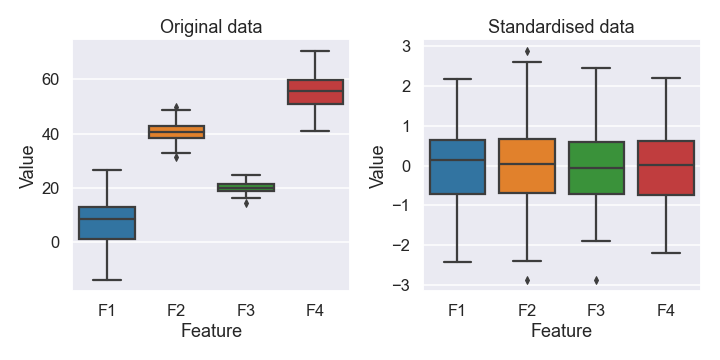

Models which use distance metrics, such as k-means and k-nearest neighbours, are highly sensitive to scale differences between features. For example, measures involving income and measures involving human heights.

Standardisation rescales each feature based on its overall mean and standard deviation.

The relative differences between feature values are preserved, but the absolute values now all have a similar mean and standard deviation.

This is also useful because it makes our hyperparameter choice more stable across different model choices. From a normalized input space, slight model changes are less likely to have drastic impacts on performance.

### Normalization: sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

data = pd.DataFrame()
data['feature_1'] = np.random.binomial(50, 0.3, size=5)
data['feature_2'] = np.random.binomial(50, 0.8, size=5)
data[['f1_scaled', 'f2_scaled']] = pd.DataFrame(scaler.fit_transform(data))
print(data)

Standardisation is easy to apply using `sklearn.preprocessing.StandardScaler`

It follows the standard fit/transform process, but you can also call `.fit_transform()` to do the two steps at once.

Here, an entire DataFrame has been standardised in one go.

### Min-max normalization

* Alternatively, one can rescale values to fall within a particular range, e.g. $\tilde{x}_i \in \mathopen[ 0, 1 \mathclose]$
* Makes fewer assumptions on the data distribution
* `MinMaxScaler()` from `sklearn`

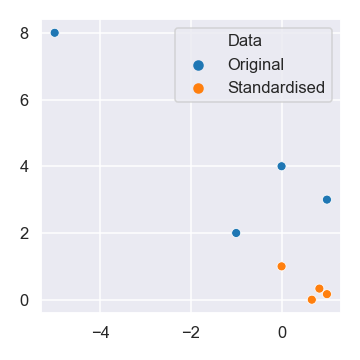



Normalizing involves changing data so that it falls within a particular range.

This is generally used when your model does not make any assumptions about the data. Often, normalisation maps features to positive only values. 

### Scaling with outliers

- Min-max normalization is susceptible to outliers - most entries would get squeezed into a much shorter range than the stated one
    - Worse interpretability and sometimes worse models' performance
- `RobustScaler()` from `sklearn` addresses this by:
    - Removing the median and scaling the data according to the quantile range (defaults to IQR: Interquartile Range)
    - The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)
- Outliers can be dropped or clipped using other rules, e.g. Tukey's method
    - Very close care and attention needs to be applied with any treatment of outliers - often it is the outliers we are most interested in!

### `RobustScaler()` example

- There are obvious outliers in the original data:

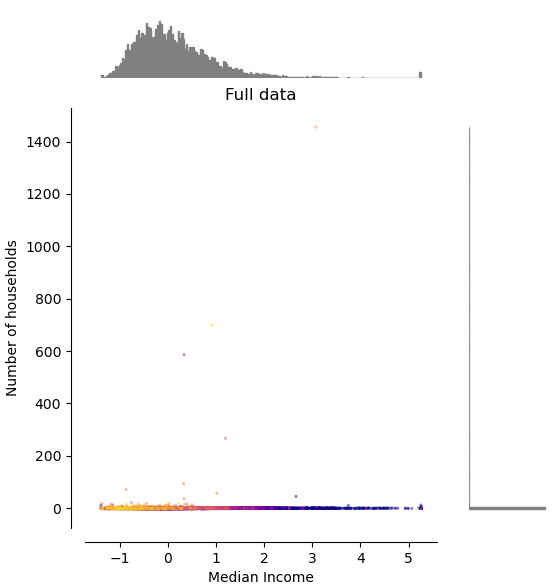

### `RobustScaler()` example

- After `RobustScaler()` is applied, the data distribution becomes suitable for further processing and visualisations:

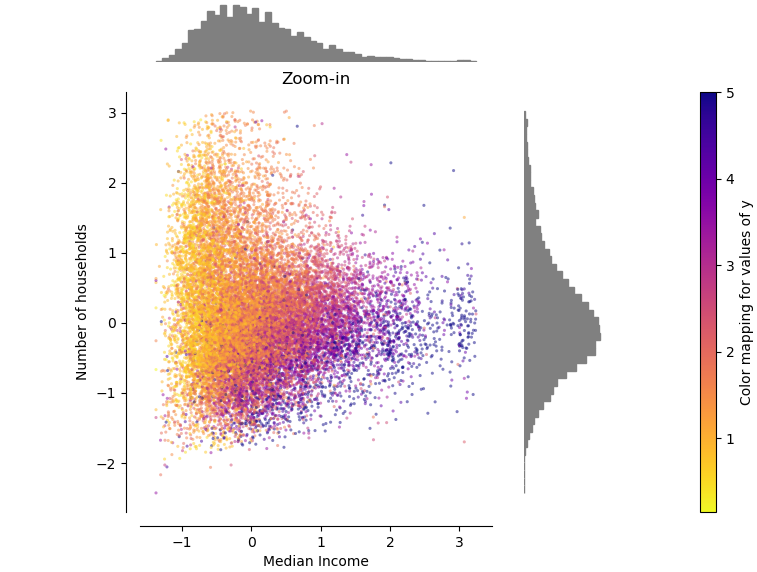

### Imputation

* Often there are missing values for some items in the dataset
* Most models do not handle missing values
* Removing observations (rows) introduces bias!
* Removing features (columns) can get rid of useful information.

In [ ]:
data = pd.DataFrame([{'Letter':'A', 'Number':118},
                     {'Letter':'K'},
                     {'Letter':'P', 'Number':123}])
data

### Imputation strategies

* Impute the missing value using information from the other samples
* Fill with value that would be most neutral for this feature
    * Constant value (e.g. zero)
    * Most common value (mode)
    * Mean
    * Median
* The most appropriate method depends on the context
* `SimpleImputer()` from `sklearn`

If there are missing values in the data, you have a few options.

The first is to drop the observations (rows) with missing values - but you need to be *very* careful here. If there is a particular reason for the missing value, this can cause bias in your data (for which the implications can be very serious)!

You could also drop the feature (column). However, this means you are possibly throwing away some potential useful data.

It depends on how important the feature is, given your objectives.

Alternatively, you can fill in the blanks using the data you already have.

The strategy you use depends on your data and your needs.

The goal is to fill with values that would be the most "neutral" for this feature. This may be the mean (which, if the data has been normalized, may be the value zero).

The median, instead of the mean, can be useful if your data has outliers.

### Time series imputation

* For sequential data, it makes sense to interpolate neighboring data points

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(10,5))

data = pd.Series([2,4,8,16,np.nan,np.nan,64,128])

g1 = data.plot(ax=axes[0])
g2 = data.interpolate().plot(ax=axes[1])

g1.set_title('Plotting with missing data');
g2.set_title('Plotting with interpolation');

This can be especially useful if you have missing datapoints in a series which you would want to plot!

### Outliers

* Values for a variable which are extreme, compared to others
    * May be an error
    * Or just how your data is
* Some machine learning algorithms are sensitive to outliers
* Is it really an outlier though? Be **very** careful!

Another aspect of data pre-processing is dealing with outliers - data points with extremely high or low values, in comparison to the rest of the data.

Sometimes these data pointsare actual mistakes. For example, if your data is inputted by hand then there could be a typing mistake. Or a sensor malfunctioned and reported incorrect data. These should normally be removed or corrected.

Genuine outliers can harm performance of machine learning algorithms. For example, a few extreme values can drastically change the fit of a linear regression and decrease accuracy on unseen data (which are very dissimilar to outliers).

But be *extremely* sure that any extreme values are actually outliers before you remove them. Perhaps you need more data points to fill in the gaps between the average and extreme values.

Or perhaps you need to transform your data to make the variables have similar scales.

### Outliers: zscore

* Outliers are relative to the data distribution
* Simple method for detecting outliers:
    * Assume a normal distribution
    * Values too far from the mean/std can be flagged
    * E.g. Outlier if $|\tilde{x}| > 3$ for $\tilde{x} = \frac{x - \mu}{\sigma}$



One way of detecting extreme values is by calculating the zscore for each value in a sample. 

This is done by subtracting the sample mean from the value, then dividing by the sample standard deviation. This is the same as having normalized features.

A cut-off point is usually set at a zscore of -3 or +3. This indicates a value which is more than three standard deviations away from the sample mean.

## Jupyter Exercise

You can now start working on the `Data Preprocessing Practical` - `data-preprocessing.ipynb`.